# Fuel Economy Analysis for Popular Car Models (1999–2008)

The goal of this project is to analyze the fuel economy trends of 38 popular car models released consistently between 1999 and 2008, using a subset of the EPA’s official fuel economy dataset:

https://fueleconomy.gov/

By exploring key variables such as engine displacement, transmission type, drive type, and fuel efficiency (both city and highway MPG), the project aims to uncover patterns and relationships that influence vehicle performance and efficiency over time.

- Investigate how different vehicle characteristics (e.g., number of cylinders, engine size, transmission type) affect fuel economy.
- Compare city and highway miles per gallon (MPG) across manufacturers, models, and years.
- Identify potential trends in fuel efficiency improvements over the decade.
- Explore the impact of vehicle drivetrain (front-wheel, rear-wheel, 4-wheel drive) on fuel economy.
- Provide statistical summaries and visualizations to support findings.


In [9]:
install.packages("ggfortify")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [8]:
install.packages("broom")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [12]:
# load libraries
library(broom)
library(ggfortify)
library(ggplot2)

In [5]:
# import the mpg.csv dataset
data<- read.csv("data/mpg.csv", header = T, sep=",")

## Data exploration

In [6]:
# view and check the dimension of the dataset
show(data)
dim(data)


      X manufacturer                  model displ year cyl      trans drv cty
1     1         audi                     a4   1.8 1999   4   auto(l5)   f  18
2     2         audi                     a4   1.8 1999   4 manual(m5)   f  21
3     3         audi                     a4   2.0 2008   4 manual(m6)   f  20
4     4         audi                     a4   2.0 2008   4   auto(av)   f  21
5     5         audi                     a4   2.8 1999   6   auto(l5)   f  16
6     6         audi                     a4   2.8 1999   6 manual(m5)   f  18
7     7         audi                     a4   3.1 2008   6   auto(av)   f  18
8     8         audi             a4 quattro   1.8 1999   4 manual(m5)   4  18
9     9         audi             a4 quattro   1.8 1999   4   auto(l5)   4  16
10   10         audi             a4 quattro   2.0 2008   4 manual(m6)   4  20
11   11         audi             a4 quattro   2.0 2008   4   auto(s6)   4  19
12   12         audi             a4 quattro   2.8 1999   6   aut

[1] 234  12

In [7]:
head(data)

,X,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [10]:
tail(data)

,X,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
229,229,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
230,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
234,234,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [11]:
# check the internal structure of the dataframe
str(data)

'data.frame':	234 obs. of  12 variables:
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


In [13]:
# count missing values in the variables
sum(is.na(data))

[1] 0

In [14]:
sapply(data, function(x) sum(is.na(x)))

X manufacturer        model        displ         year          cyl 
           0            0            0            0            0            0 
       trans          drv          cty          hwy           fl        class 
           0            0            0            0            0            0

In [15]:
# check the column names for the dataframe
names(data)

[1] "X"            "manufacturer" "model"        "displ"        "year"        
 [6] "cyl"          "trans"        "drv"          "cty"          "hwy"         
[11] "fl"           "class"

In [16]:
# drop the first column X of the dataframe
data<- data[, -1]

In [17]:
dim(data)

[1] 234  11

## Data Visualization


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


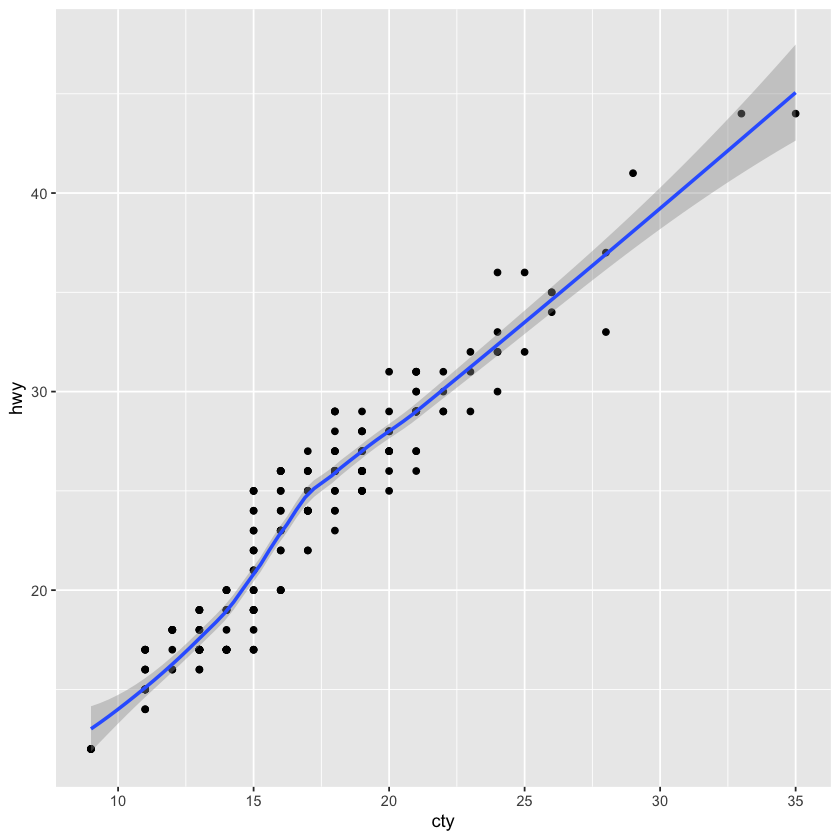

In [18]:
# plot a scatter plot for the variables with cty on the x-axis
# hwy on the y-axis
ggplot(data, aes(x = cty, y = hwy)) + geom_point() + stat_smooth()

## Model building

In [19]:
# Find the correlation between the variables
cor(data$cty, data$hwy)

[1] 0.9559159

Based on the scatter plot and correlation analysis, there is a strong positive relationship between city and highway fuel economy. Vehicles that perform efficiently in city driving tend to perform efficiently on highways as well, as indicated by the high correlation coefficient of approximately 0.956.

Let's fit a linear regression model predicting highway MPG (hwy) based on city MPG (cty).

In [20]:
# create a simple linear regression model using the variable
model<- lm(hwy~cty, data=data)
model


Call:
lm(formula = hwy ~ cty, data = data)

Coefficients:
(Intercept)          cty  
      0.892        1.337  


The regression equation is:

hwy = 0.892 + 1.337 * cty

This means that for each additional mile per gallon in city fuel economy, highway fuel economy is expected to increase by about 1.34 miles per gallon. 

`geom_smooth()` using formula = 'y ~ x'


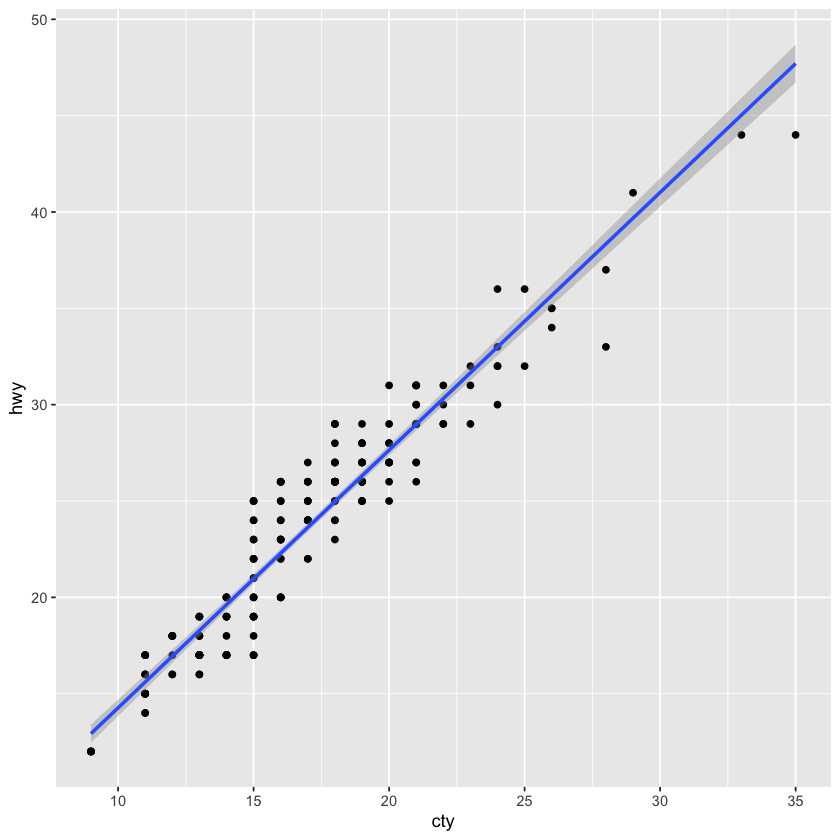

In [21]:
# plot the regression line for the model
ggplot(data, aes(x = cty, y = hwy)) + geom_point() + stat_smooth(method=lm)


The line fits very well across the points matching our very strong correlation.

## Model Assessment

In [22]:
# assess the summary of the fitted model
summary(model)


Call:
lm(formula = hwy ~ cty, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3408 -1.2790  0.0214  1.0338  4.0461 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.89204    0.46895   1.902   0.0584 .  
cty          1.33746    0.02697  49.585   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.752 on 232 degrees of freedom
Multiple R-squared:  0.9138,	Adjusted R-squared:  0.9134 
F-statistic:  2459 on 1 and 232 DF,  p-value: < 2.2e-16


- The model shows an excellent fit with a Multiple R-squared of 0.9138 and an Adjusted R-squared of 0.9134, indicating that about 91% of the variance in highway MPG can be explained by city MPG.

- The predictor (cty) is highly statistically significant (p-value < 2e-16), suggesting a very strong relationship between city and highway fuel economy.

- The residual standard error is 1.752, suggesting relatively small prediction errors compared to the scale of the dat

In [23]:
# calculate the confidence interval for the coefficients
confint(model)

,2.5 %,97.5 %
(Intercept),-0.03189534,1.815978
cty,1.28431197,1.390599


In [24]:
# calculate the prediction error of the fitted model
sigma(model)*100/mean(data$hwy)

[1] 7.475581

The linear model shows a very strong positive relationship between city and highway fuel economy, with approximately 91% of the variation explained. City MPG is a highly significant predictor of highway MPG, and the model’s prediction error 7.48% is relatively low.


## Model Prediction

In [25]:
# find the fitted values of the simple regression model
fitted <- predict.lm(model)
head(fitted, 3)

1        2        3 
24.96624 28.97861 27.64115

In [41]:
model_diag_metrics <- augment(model)
head(model_diag_metrics, 10)

hwy,cty,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,18,24.96624,4.03375791,0.004581995,1.735813,1.225242e-02,2.30728553
29,21,28.97861,0.02139108,0.008336700,1.756077,6.316693e-07,0.01225871
31,20,27.64115,3.35884669,0.006611237,1.742023,1.230788e-02,1.92320163
30,21,28.97861,1.02139108,0.008336700,1.754781,1.440152e-03,0.58533460
26,16,22.29133,3.70866914,0.004448333,1.738965,1.005228e-02,2.12119427
26,18,24.96624,1.03375791,0.004581995,1.754754,8.047109e-04,0.59130338
27,18,24.96624,2.03375791,0.004581995,1.750949,3.114589e-03,1.16329743
26,18,24.96624,1.03375791,0.004581995,1.754754,8.047109e-04,0.59130338
25,16,22.29133,2.70866914,0.004448333,1.746970,5.362164e-03,1.54923862


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


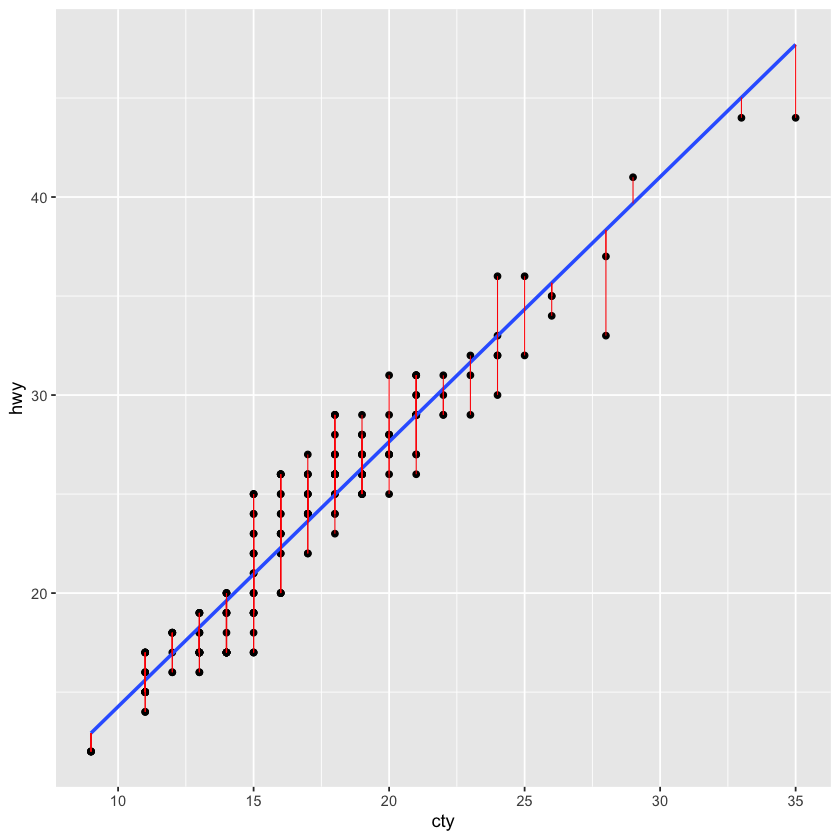

In [27]:
# Visualize the residuals of the fitted model
ggplot(model_diag_metrics, aes(x = cty, y = hwy)) + geom_point() + stat_smooth(method=lm, se = FALSE) + 
geom_segment(aes(xend = cty, yend = .fitted), color="red", size = 0.3)


In [28]:
# Predict new values using the model
predict(object = model, newdata = data.frame(cty = c(21, 27, 14)))

1        2        3 
28.97861 37.00334 19.61642

Visualizing the residuals showed that most points were closely aligned with the fitted regression line, with relatively small vertical deviations, confirming the model’s reliability.

The model was used to predict highway MPG for new city MPG values:
- For cty = 21, predicted hwy ≈ 28.98
- For cty = 27, predicted hwy ≈ 37.00
- For cty = 14, predicted hwy ≈ 19.61

These new predictions are consistent with the positive linear relationship observed in the original data.

## Assumptions check: Diagnostic plots

To validate the assumptions of the linear regression model, a set of diagnostic plots will be analyzed.

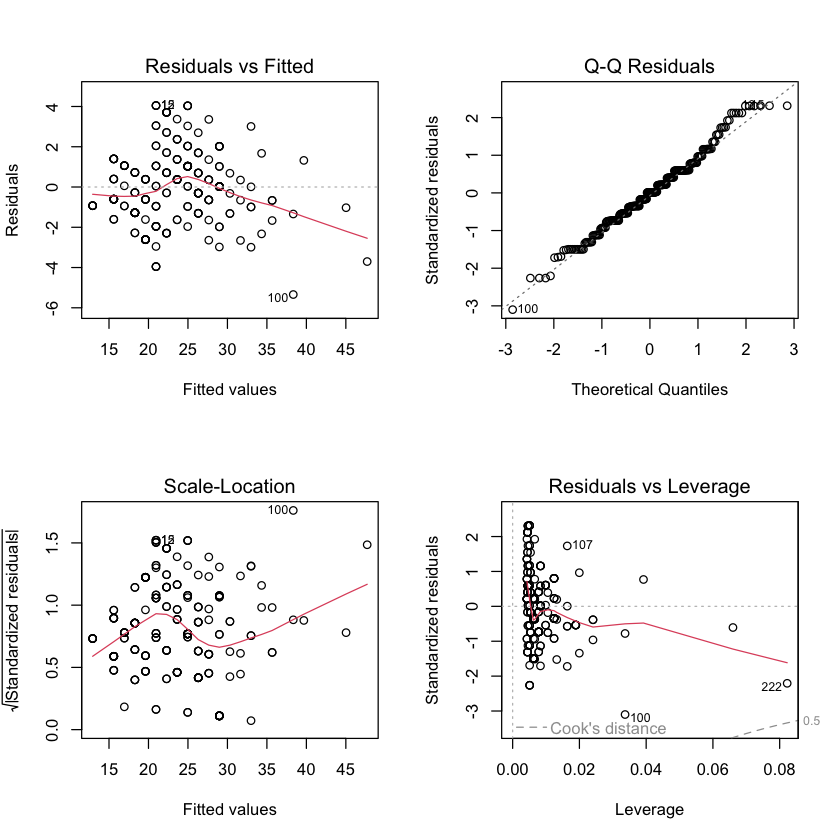

In [30]:
# plotting the fitted model
par(mfrow = c(2,2)) # this plots the figures in a 2x2
plot(model)

- Residuals vs Fitted Plot:
The residuals are randomly scattered around the horizontal line with no clear pattern, supporting the assumption of linearity and suggesting that the relationship between cty and hwy is appropriately modeled as linear.

- Normal Q-Q Plot:
The residuals closely follow the 45-degree line, indicating that the residuals are approximately normally distributed, fulfilling the normality assumption. Minor deviations at the tails were observed but are not severe.

- Scale-Location Plot:
The spread of standardized residuals appears relatively constant across fitted values, supporting the assumption of homoscedasticity (constant variance of errors).

- Residuals vs Leverage Plot:
A few points exhibit higher leverage but no points show extreme influence (Cook’s distance is small), indicating no significant influential observations affecting the model fit.

To sum up, the diagnostic plots confirm that the key assumptions of linear regression (linearity, normality of residuals, homoscedasticity, and lack of influential outliers) are reasonably satisfied. The model is considered valid and reliable for prediction.

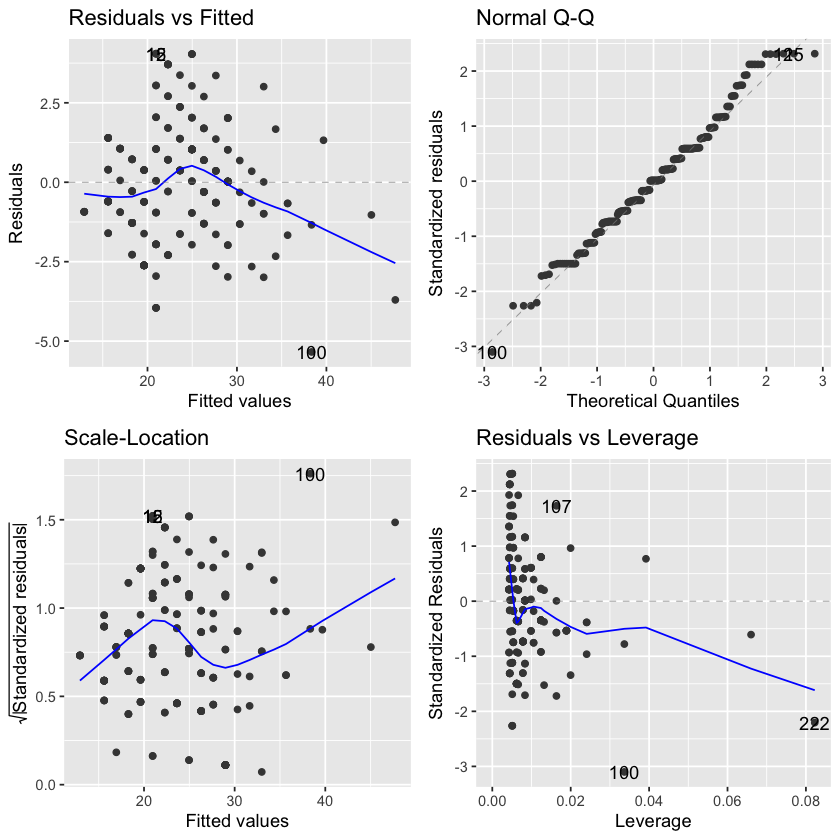

In [31]:
# better plot version
autoplot(model)

In [32]:
# return par back to default
dev.off()
par(mfrow = c(1,1))

null device 
          1

To further improve the model assumptions, a square root transformation of the predictor variable (cty) will be applied.

In [42]:
# build another regression model
model1 <- lm(hwy~sqrt(cty), data = data)

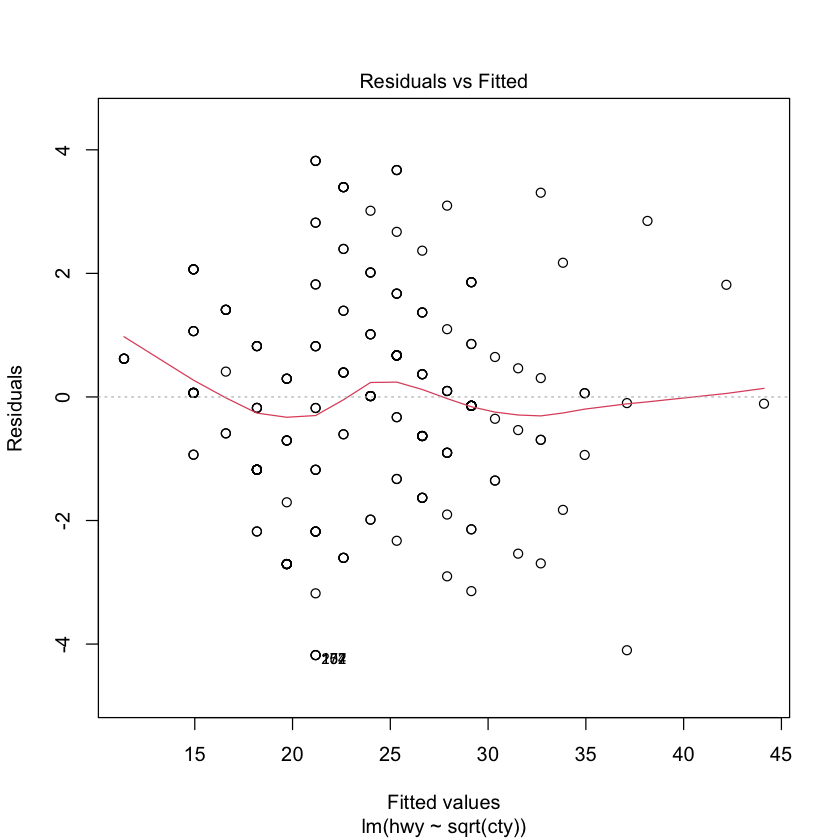

In [43]:
# return the first diagnostic plot for the model
plot(model1, 1)

The transformed model (hwy ~ sqrt(cty)) produced residuals that were more symmetrically and randomly distributed around zero, indicating improved linearity and homoscedasticity compared to the original model.

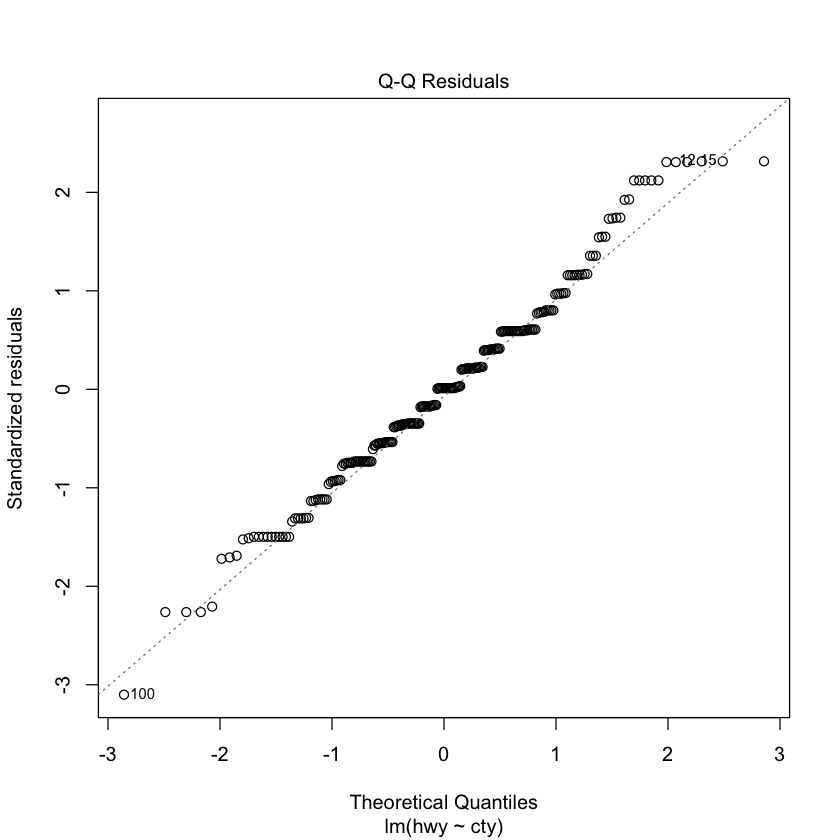

In [34]:
# return the second diagnostic plot for the model
plot(model, 2)

The Q-Q plot shows that the residuals are approximately normally distributed, with only minor deviations at the extremes, confirming that the model’s normality assumption holds.

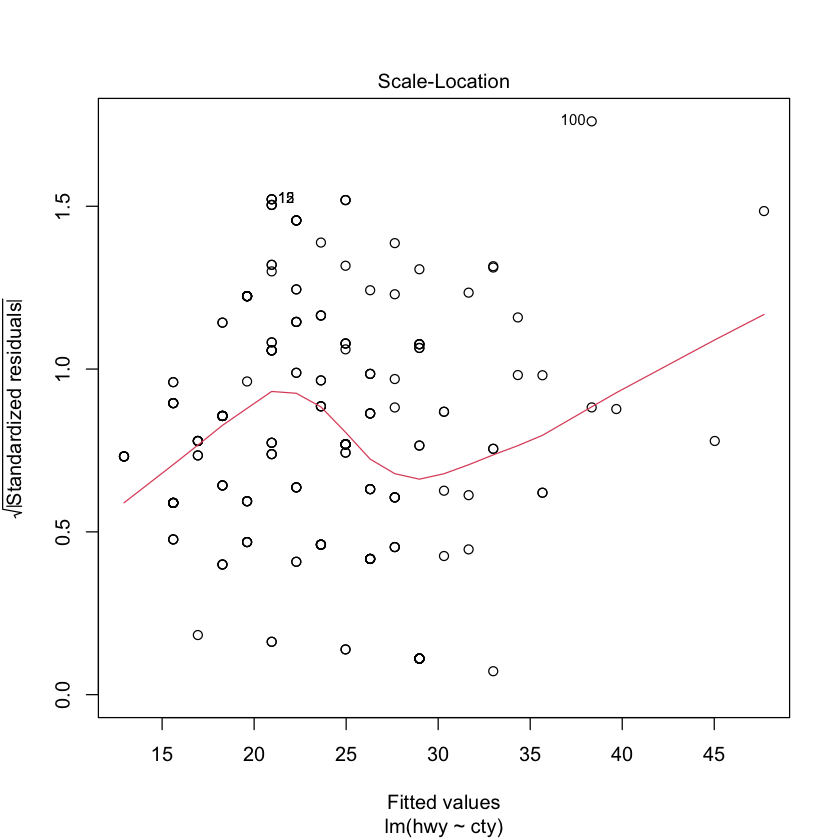

In [35]:
# return the second diagnostic plot for the model
plot(model, 3)

The Scale-Location plot shows that the variance of residuals is relatively stable across fitted values, confirming that the assumption of constant variance (homoscedasticity) is reasonably met.

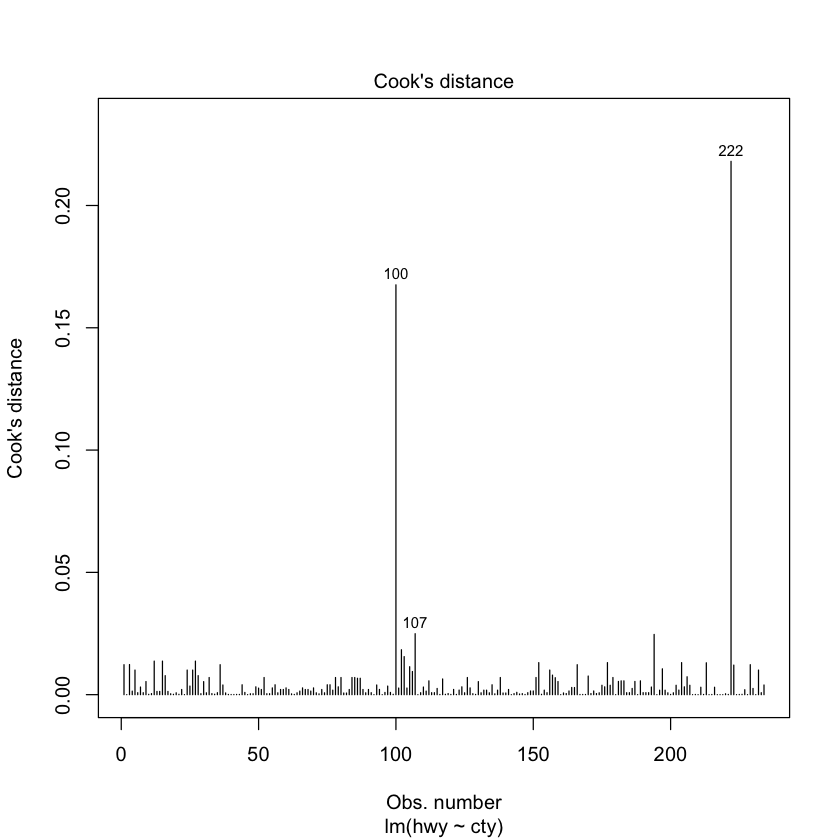

In [44]:
# return the fourth diagnostic plot for the model
plot(model, 4)

Most observations have very low Cook’s Distance values, indicating that they have little influence on the fitted model.
However, two observations 100 and 222 have relatively higher Cook’s Distance values compared to the rest. The Cook’s Distance values are still below the general rule-of-thumb threshold of 1, meaning they are not considered extremely influential that could significantly distort the model’s results. The model is considered robust.

## Multiple Regression

Let's build a multiple linear regression model predicting highway MPG (hwy) from two predictors: city MPG (cty) and number of cylinders (cyl)


In [36]:
# build the multiple regression model with hwy on the y-axis and cty and cyl on the x-axis
mul_reg_model <- lm(hwy~ cty + cyl, data = data)
mul_reg_model


Call:
lm(formula = hwy ~ cty + cyl, data = data)

Coefficients:
(Intercept)          cty          cyl  
   -0.07702      1.36425      0.08784  


In [37]:
# check the summary of the multiple regression model
summary(mul_reg_model)


Call:
lm(formula = hwy ~ cty + cyl, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4735 -1.1952  0.0398  0.9934  4.1691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.07702    1.40888  -0.055    0.956    
cty          1.36425    0.04559  29.924   <2e-16 ***
cyl          0.08784    0.12040   0.730    0.466    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.754 on 231 degrees of freedom
Multiple R-squared:  0.914,	Adjusted R-squared:  0.9132 
F-statistic:  1227 on 2 and 231 DF,  p-value: < 2.2e-16


- The Coefficient for cty is highly significant as p-value < 2e-16 which means there is a strong positive relationship with hwy, just like in the simple regression.
- The coefficient for cyl is not statistically significant as p-value = 0.466 greather than significance value which suggests that after accounting for city MPG, the number of cylinders does not significantly predict highway MPG.
- The value of adjusted R-squared is slightly better than the R-squared while the residual standard error is very close to the simple regression model too.

In summary, city MPG remained a highly significant predictor, whereas the number of cylinders was not statistically significant. Adding cyl did not meaningfully improve the model’s performance compared to the simpler model with cty alone: cty alone is sufficient for accurate prediction.

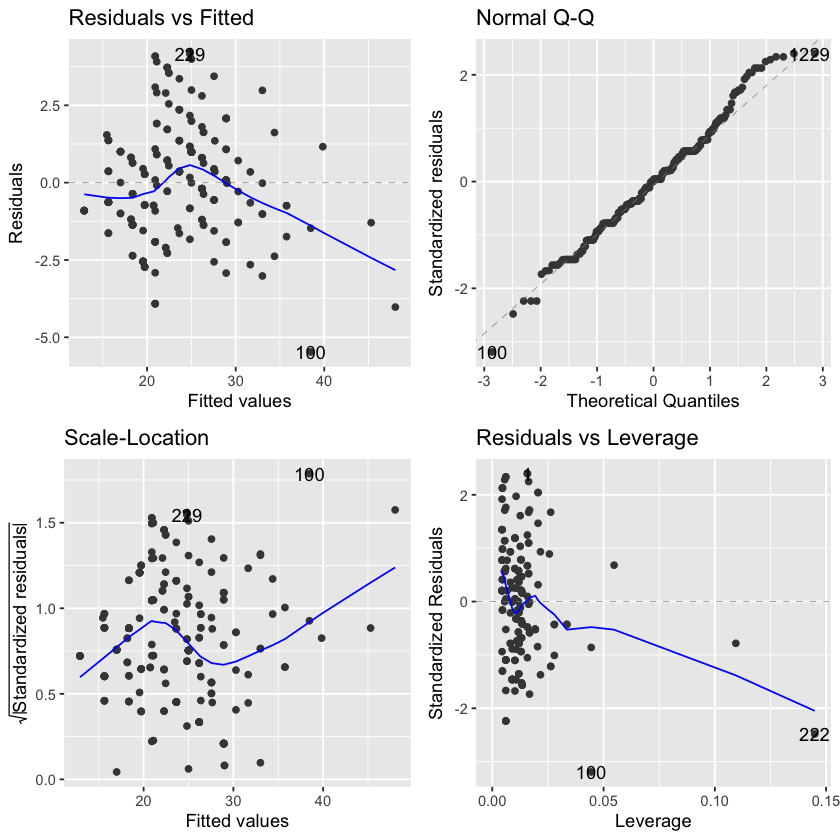

In [45]:
# plot the fitted multiple regression model
autoplot(mul_reg_model)

The multiple regression model diagnostics suggest that the assumptions of linearity, normality, homoscedasticity, and lack of influential points are reasonably satisfied. 
Minor deviations are present but not serious enough to impact the validity of the model. The observation 222 shows slightly higher leverage while obs 100 and 229 appear mildly influential but no extreme Cook’s distances which means no major influential points distorting the model.The model is considered appropriate for prediction and interpretation.